<a href="https://colab.research.google.com/github/mohadesehazari98/Quantum_Library/blob/main/Xanadu/Cat_Qubit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#...Installation...#
!pip install strawberryfields --upgrade

In [2]:
#...IMPORTING LIBRARIES...#

import numpy as np
import strawberryfields as sf 
from strawberryfields.ops import *
from strawberryfields.apps import sample
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In the paper [Reference](https://journals.aps.org/pra/pdf/10.1103/PhysRevA.68.042319?casa_token=u1SaMhcSnmwAAAAA%3AiabyBitCd4es2kv31DOh7UtyfuQPaa26Azf0_p7omlioX0ANoqikg5WLSZdW0IXTrJ6dMt0kKMU-) the squeezed state is represented as:
$ Psi $   
we can have a corespondance between Landa and r which is $ \lambda = - e^{i\phi} tanh(r) $

lets first calculate the Mean Photon number for  $\lambda cos^2(\theta) = 0.4 $

In [3]:
#...SEED...#
np.random.seed(42)
phi_r = (np.pi)
phi_B = (np.pi)/2
r_squeezed = 1.5
k = 0.268530
theta = k * (np.pi)/2
shots = 2500
modes_N = 2

In [4]:
#...TOKEN KEY...#

import xcc
settings = xcc.Settings(REFRESH_TOKEN="eyJhbGciOiJIUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICIwYTdjOGE5Yi1lMzdkLTQ0MzItOTU2OC0xNzI3YzEwNmYyMzEifQ.eyJpYXQiOjE2NjgzMDQzNDQsImp0aSI6IjllY2E5MzczLTRkZDQtNGVmNy1iYmE4LTU5NmNhMzNhNWUyMyIsImlzcyI6Imh0dHBzOi8vcGxhdGZvcm0ueGFuYWR1LmFpL2F1dGgvcmVhbG1zL3BsYXRmb3JtIiwiYXVkIjoiaHR0cHM6Ly9wbGF0Zm9ybS54YW5hZHUuYWkvYXV0aC9yZWFsbXMvcGxhdGZvcm0iLCJzdWIiOiI5YjVhYTExYS03NWY4LTQ0YTItYjkwZS1lZmRlZmM0YmRkOTciLCJ0eXAiOiJPZmZsaW5lIiwiYXpwIjoicHVibGljIiwic2Vzc2lvbl9zdGF0ZSI6IjIzMDBjOTE5LTRhNmYtNGI0ZC05ZTBmLTlkMmNmMTdlNmU4OSIsInNjb3BlIjoicHVibGljLXJvbGVzIHByb2ZpbGUgZW1haWwgb2ZmbGluZV9hY2Nlc3MiLCJzaWQiOiIyMzAwYzkxOS00YTZmLTRiNGQtOWUwZi05ZDJjZjE3ZTZlODkifQ.2MKFiX-Ranfnzo3xQezaGLao6wYVzNOxyiIKrtn50Mc")
settings.save()

In [5]:
#...SETTING THE CIRCUIT/PROGRAM...#

program = sf.Program(modes_N)

In [6]:
eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 7})
with program.context as q:

  Sgate(r_squeezed,phi_r) | q[0]
  Vac | q[1]
  BSgate(theta,phi_B) | (q[0], q[1])

  MeasureFock() | q[0]
  MeasureFock() | q[1]  

In [7]:
#post selection 
m = [0, 1, 2, 3, 4, 5]
Len_m = len(m)
result = np.zeros((shots,2))
Photon_Number = np.zeros((1,2))
for i in range(len(result)):
  out_result = eng.run(program)
  result[i,:] = out_result.samples


for i in range(len(result)):
  j = result[i,0]
  k = result[i,1]
  flag = 0
  for w in range(len(Photon_Number)):
    if j == Photon_Number[w,0]:
      Photon_Number[w,1] = Photon_Number[w,1] + k
      flag = 1
  if flag == 0:
    Photon_Number = np.vstack([Photon_Number, result[i,:]])

Mean_Photon_Number = Photon_Number[:,1] / shots

for $\lambda cos^2(\theta) = 0.4 $ and $ m = [0,1,2,3,4,5]$

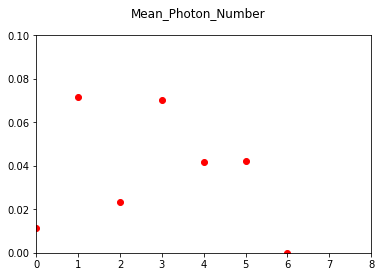

In [8]:
plt.plot(Photon_Number[:,0], Mean_Photon_Number, 'ro')
plt.axis([0, 8, 0, 0.1])
plt.suptitle('Mean_Photon_Number')
plt.show()


Now we would set m to be "0" and plot the Mean_Photon_Number for differet $\theta$

$ \lambda cos^2(\theta) = [0,0.08,0.16,0.24,0.32,0.4,0.48,0.64,0.72,0.8] $

In [6]:
k = [0,0.08,0.16,0.24,0.32,0.4,0.48,0.64,0.72,0.8]
t = np.zeros((len(k),1))
for i in range(len(k)):
  t[i,0] = np.arccos(np.sqrt(k[i]/np.tanh(r_squeezed))) / 2

In [7]:
teta = t[9,0]
print(teta)


0.17390121071207526


In [8]:
eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 7})
with program.context as q:

  Sgate(r_squeezed,phi_r) | q[0]
  Vac | q[1]
  BSgate(teta,phi_B) | (q[0], q[1])

  MeasureFock(select=0) | q[0]
  MeasureFock() | q[1] 

In [ ]:
#post selection 
m = 0
result = np.zeros((shots,2))
for i in range(len(result)):
  out_result = eng.run(program)
  result[i,:] = out_result.samples

mean_photon = sum(result[:,1]) / shots

I had to run this section 10 times and write down the values of $ <n> mean-photon-number $

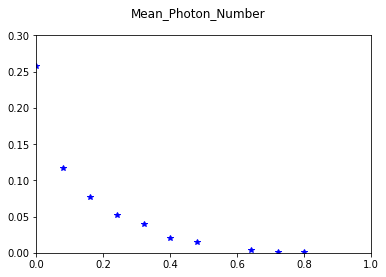

In [13]:
Mean_Phton_NumbeR = [0.2576, 0.1176, 0.0768, 0.052, 0.04, 0.02, 0.0144, 0.0032, 0.0016, 0.0008]

plt.plot(k, Mean_Phton_NumbeR, 'b*')
plt.axis([0, 1, 0, 0.3])
plt.suptitle('Mean_Photon_Number')
plt.show()